In [119]:
'''
Uso de Máquina de Soporte Vectorial como Regresor.

DOCUMENTACIÓN OFICIAL SKLEARN
https://scikit-learn.org/stable/modules/svm.html#svm
https://scikit-learn.org/stable/modules/svm.html#svm-regression

'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
                                
##############################################################################
# class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
#                       tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
#                       cache_size=200, verbose=False, max_iter=- 1)
##############################################################################

warnings.filterwarnings('ignore')


In [78]:
# cargamos los datos en un df, directamente desde Seaborn
# nos interesa ver si podemos encontrar relaciones entre algunas variables continuas

data = sns.load_dataset('anscombe')

In [120]:
print(data.shape)
print(data.head(10))
print(data.columns)
print(data.tail())

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


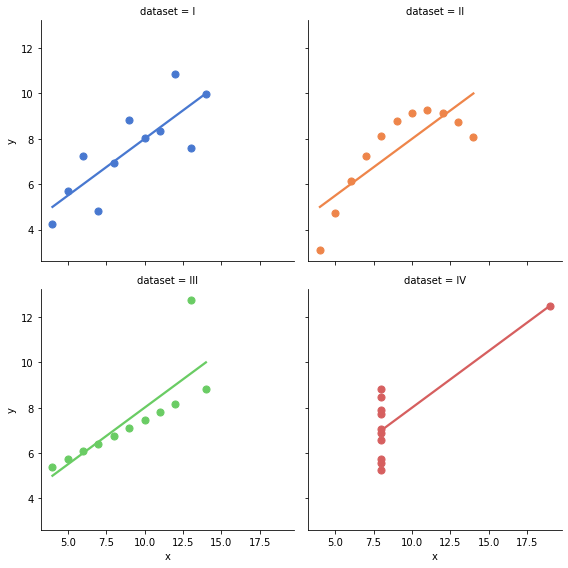

In [122]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=data, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [121]:
# separamos el dataset II
data2=data[data['dataset']=='II']
data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


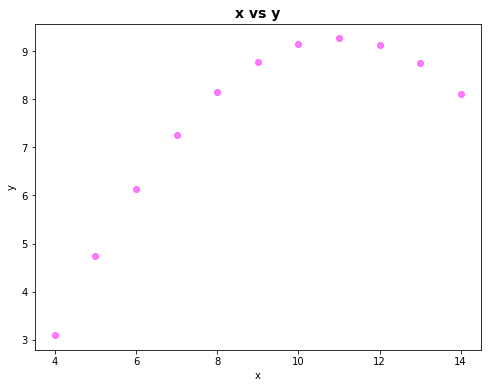

In [123]:
# graficaremos los valores del dataset

fig=plt.figure(figsize=(8,6))
plt.scatter(data2['x'],data2['y'],color="magenta", alpha=0.5)
plt.title("x vs y",fontsize=14,fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()


In [81]:
# Definimos las variables predictoras e independiente
y=data2.pop('y')
y

11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [126]:
# estadarizamos caacterísticas
x_train=data2['x'].to_frame()
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x_train)
y = sc_y.fit_transform(y.reshape(-1, 1))
print(x.shape)
print(y.shape)
x

(11, 1)
(11, 1)


array([[ 0.31622777],
       [-0.31622777],
       [ 1.26491106],
       [ 0.        ],
       [ 0.63245553],
       [ 1.58113883],
       [-0.9486833 ],
       [-1.58113883],
       [ 0.9486833 ],
       [-0.63245553],
       [-1.26491106]])

In [127]:
# Ahora ponemos a trabajar a la maquinita...
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos
# instanciamos modelo LINEAL

sv = SVR(kernel= 'linear')

# entrenamos...
sv.fit(x, y)

'''
class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, 
C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
class sklearn.svm.linearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', 
fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)
'''

"\nclass sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, \nC=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)\nclass sklearn.svm.linearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', \nfit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)\n"

In [130]:
# VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR sobre X_test
x_otro=pd.DataFrame([[4.5],[6.5],[8.5],[10.5],[12.5]])
xt = sc_x.transform(x_otro)
y_pred=sv.predict(xt).reshape(-1,1)
#y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
print(xt)
print(y_pred)

[[-1.42302495]
 [-0.79056942]
 [-0.15811388]
 [ 0.47434165]
 [ 1.10679718]]
[[-0.99488392]
 [-0.47865061]
 [ 0.0375827 ]
 [ 0.55381601]
 [ 1.07004931]]


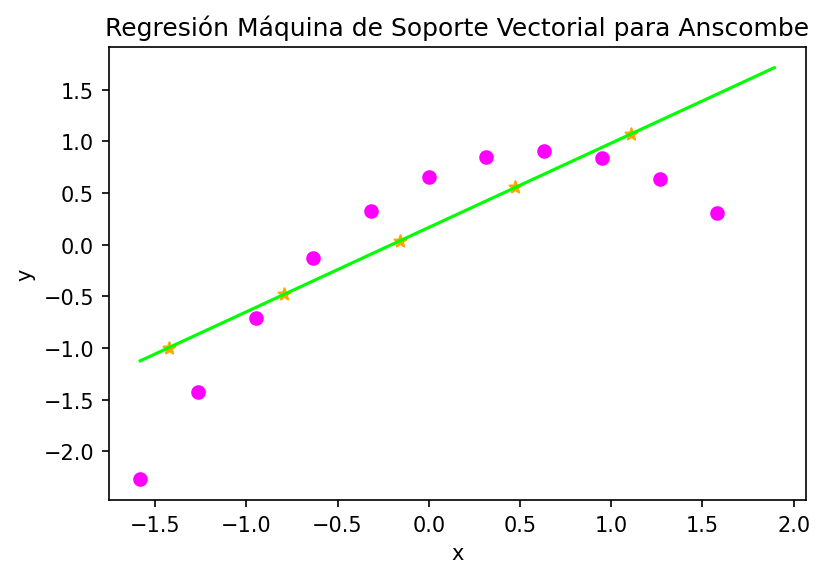

In [131]:
x_vect = np.arange(4., 15., 0.01) # es un vector numpy, NO pandas
x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col
xg=sc_x.transform(x_graf)
#x_graf = xg.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col
# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(x, y, c = 'magenta')     # grafica los datos
plt.plot(xg, sv.predict(xg), color = 'lime') # id predicción
plt.scatter(xt, y_pred, color='orange', marker='*')
plt.plot()
plt.title(f'Regresión Máquina de Soporte Vectorial para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura


In [132]:
# preguntamos qué tal predice sobre los datos ingresados
print('\n')
print(f'Precisión: {sv.score(x, y)}')
print('\n')




Precisión: 0.6384728024535903




In [133]:
# A eso se refiere con problema linealmente separable :)
# probemos otro kernel
sv1 = SVR(kernel= 'rbf', gamma=0.7)

# entrenamos...
sv1.fit(x, y)

SVR(gamma=0.7)

In [134]:
y_pred1=sv1.predict(xt).reshape(-1,1)

print(y_pred1)

[[-1.45717452]
 [-0.52899651]
 [ 0.4279529 ]
 [ 0.8007877 ]
 [ 0.67167241]]


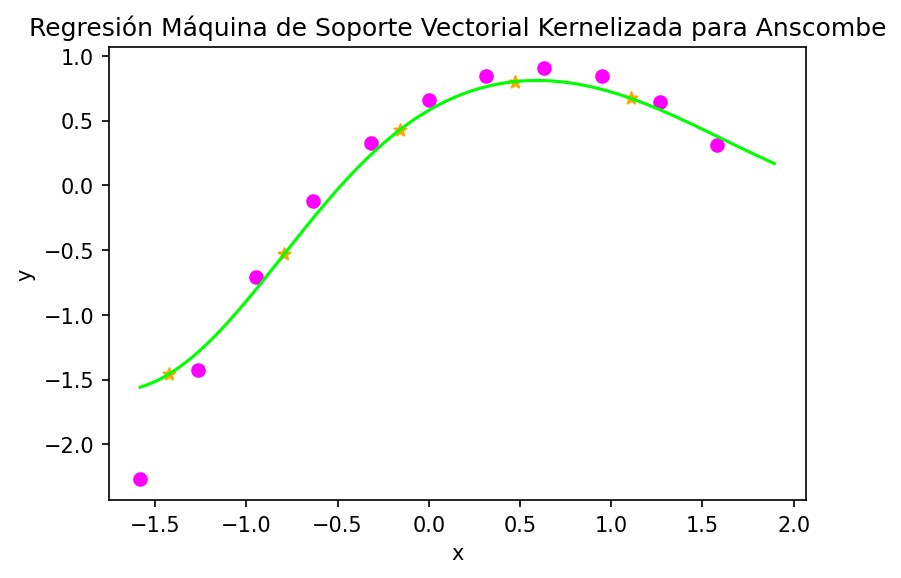

In [135]:

# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(x, y, c = 'magenta')     # grafica los datos
plt.plot(xg, sv1.predict(xg), color = 'lime') # id predicción
plt.scatter(xt, y_pred1, color='orange', marker='*')
plt.plot()
plt.title(f'Regresión Máquina de Soporte Vectorial Kernelizada para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura


In [136]:
print(f'Precisión: {sv1.score(x, y)}')


Precisión: 0.9452602767211021
